# An Exploratory Comparison of Machine Learning Models measuring Attitude towards Mental Health in the Workplace.

In [ ]:
# By SAMUEL. M. OJURI - B1604599

## Introduction

Research and analysis from the <a href="https://www.gov.uk/government/publications/thriving-at-work-a-review-of-mental-health-and-employers">Thriving at Work Review</a> state that poor mental health of employees cost employers between £33 billion and £42 billion each year, with an estimated annual cost of between £74 billion and £99 billion to the UK economy. A <a href="https://www.mind.org.uk/workplace/mental-health-at-work/taking-care-of-yourself/">good proportion</a> of employees experience common mental health issues, including anxiety and depression, which significantly impacts their productivity at work. 

The objective of this study is to analyse and predict the attitude of employees towards mental health in the workplace. The dataset used for analysis is the 'OSMI Mental Health in Tech Survey 2016', which was a survey carried out in 2016 to document the attitude of employees in the Tech industry towards mental health. More details can be found at https://osmhhelp.org/research . The response variable selected from the dataset aims to predict whether an employee will seek treatment for mental health or not, presenting a **binary classification problem**. Details of the survey questions used to capture the underlying data can be found at 
https://osmi.typeform.com/report/Ao6BTw/U76z . 1,570 responses were recorded. The dataset used for analysis is publicly available at https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016. 

## 1. Import required libraries and data

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, auc, roc_curve, plot_roc_curve, confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


# Seaborn formatting
sns.set_style(style="darkgrid")
sns.set_palette(palette = 'pastel')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Import Data
df = pd.read_csv('Dataset\mental-heath-in-tech-survey-2016.csv')


# Preview the dataset
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## 2. Data Preprocessing 

In [ ]:
# Check information about the dataframe
df.describe

<bound method NDFrame.describe of       Are you self-employed?  \
0                          0   
1                          0   
2                          0   
3                          1   
4                          0   
...                      ...   
1428                       1   
1429                       1   
1430                       0   
1431                       0   
1432                       0   

     How many employees does your company or organization have?  \
0                                                26-100           
1                                                  6-25           
2                                                  6-25           
3                                                   NaN           
4                                                  6-25           
...                                                 ...           
1428                                                NaN           
1429                                         

In [ ]:
# Check how many rows and columns are in the dataset
df.shape

(1433, 63)

In [ ]:
#Checking general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [ ]:
# Check for missing values
# The dataset appears to have many missing values
df.isna().sum()

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

In [ ]:
""" To reduce the impact of missing values on my analysis, 
I filtered and droped features where questions were not answered by 50% of the 1433 records available.
13 Columns were removed from the initial 63 Columns leaving 50 remaining columns
"""

features=(list(df))
Count=0
HighMissingValues=[]
for col in features:
    if(sum(pd.isnull(df[col]))>721):
        Count=Count+1
        HighMissingValues.append(col)
        df.drop([col],axis=1,inplace=True)

        
df.shape

(1433, 50)

In [ ]:
# To solve the problem of other missing values the sinple inputer method fron sklearn 
# was used to update each record with the most frequent value

SimpleImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
SimpleImputer.fit(df)
df = pd.DataFrame(data = SimpleImputer.transform(df), columns = df.columns)

#Check if there are still for missing values
df.isnull().sum()

Are you self-employed?                                                                                                                            0
How many employees does your company or organization have?                                                                                        0
Is your employer primarily a tech company/organization?                                                                                           0
Does your employer provide mental health benefits as part of healthcare coverage?                                                                 0
Do you know the options for mental health care available under your employer-provided coverage?                                                   0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?            0
Does your employer offer resources to learn more about mental health concerns and options for seeking help?     

In [ ]:
#Rename columns for easy analysis

ColumnNames = [
    'Self employed','No employees','Tech company','Benefits','Care options','Wellness program',
    'Ment health resources','Anonimity','Sick leave access','Ment health consequence','Phys health consequence',
    'Coworkers','Supervisor','Mental vs Physical','Obs consequence','Prev Employer','Prev Ment health benefits',
    'Prev Ment health options','Prev wellness program','Prev Ment health resources','Prev Anonimity',
    'Prev Ment health consequence','Prev Phys health consequence','Prev Coworkers','Prev Supervisor',
    'Prev Mental vs Physical','Prev Obs consequence','Phys health interview','Why or why not ph',
    'Ment health interview','Why or why not mh','Ment health on career','Ment health on co-workers',
    'Reveal MH to friends','Bad MH Experience','Family History of MH','Past Ment Health Disorder',
    'Current Ment Health Disorder','Diagnosed of MH condition','Seek Treatment','Work Interference - Treated',
    'Work Interference - Not treated','Age','Gender','Res Country','Res State','Work Country','Work State',
    'Work Position','Remote Work']

df.columns = ColumnNames
df.head()

,Self employed,No employees,Tech company,Benefits,Care options,Wellness program,Ment health resources,Anonimity,Sick leave access,Ment health consequence,...,Work Interference - Treated,Work Interference - Not treated,Age,Gender,Res Country,Res State,Work Country,Work State,Work Position,Remote Work
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,California,United Kingdom,California,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,California,United Kingdom,California,Back-end Developer,Always
3,1,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Sometimes,Sometimes,43,male,United Kingdom,California,United Kingdom,California,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [ ]:
#Checking data completness and properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Self employed                    1433 non-null   object
 1   No employees                     1433 non-null   object
 2   Tech company                     1433 non-null   object
 3   Benefits                         1433 non-null   object
 4   Care options                     1433 non-null   object
 5   Wellness program                 1433 non-null   object
 6   Ment health resources            1433 non-null   object
 7   Anonimity                        1433 non-null   object
 8   Sick leave access                1433 non-null   object
 9   Ment health consequence          1433 non-null   object
 10  Phys health consequence          1433 non-null   object
 11  Coworkers                        1433 non-null   object
 12  Supervisor                       1

### Description of the dataset features

In [ ]:
%%html
<style>
table {float:left}
<style/>

| Feature | Description (Survey Question)|
|:-| :-|
|Self employed|Are you self-employed?|
|No employees|How many employees does your company or organization have?|
|Tech company|Is your employer primarily a tech company/organization?|
|Benefits|Does your employer provide mental health benefits as part of healthcare coverage?|
|Care options|Do you know the options for mental health care available under your employer-provided coverage?|
|Wellness program|Has your employer ever formally discussed mental health (for example as part of a wellness campaign or other official communication)?|
|Ment health resources|Does your employer offer resources to learn more about mental health concerns and options for seeking help?|
|Anonimity|Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?|
|Sick leave access|If a mental health issue prompted you to request a medical leave from work asking for that leave would be:|
|Ment health consequence|Do you think that discussing a mental health disorder with your employer would have negative consequences?|
|Phys health consequence|Do you think that discussing a physical health issue with your employer would have negative consequences?|
|Coworkers|Would you feel comfortable discussing a mental health disorder with your coworkers?|
|Supervisor|Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?|
|Mental vs Physical|Do you feel that your employer takes mental health as seriously as physical health?|
|Obs consequence|Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?|
|Prev Employer|Do you have previous employers?|
|Prev Ment health benefits|Have your previous employers provided mental health benefits?|
|Prev Ment health options|Were you aware of the options for mental health care provided by your previous employers?|
|Prev wellness program|Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?|
|Prev Ment health resources|Did your previous employers provide resources to learn more about mental health issues and how to seek help?|
|Prev Anonimity|Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?|
|Prev Ment health consequence|Do you think that discussing a mental health disorder with previous employers would have negative consequences?|
|Prev Phys health consequence|Do you think that discussing a physical health issue with previous employers would have negative consequences?|
|Prev Coworkers|Would you have been willing to discuss a mental health issue with your previous co-workers?|
|Prev Supervisor|Would you have been willing to discuss a mental health issue with your direct supervisor(s)?|
|Prev Mental vs Physical|Did you feel that your previous employers took mental health as seriously as physical health?|
|Prev Obs consequence|Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?|
|Phys health interview|Would you be willing to bring up a physical health issue with a potential employer in an interview?|
|Why or why not ph|Why or why not?|
|Ment health interview|Would you bring up a mental health issue with a potential employer in an interview?|
|Why or why not mh|Why or why not?|
|Ment health on career|Do you feel that being identified as a person with a mental health issue would hurt your career?|
|Ment health on co-workers|Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?|
|Reveal MH to friends|How willing would you be to share with friends and family that you have a mental illness?|
|Bad MH Experience|Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?|
|Family History of MH|Do you have a family history of mental illness?|
|Past Ment Health Disorder|Have you had a mental health disorder in the past?|
|Current Ment Health Disorder|Do you currently have a mental health disorder?|
|Diagnosed of MH condition|Have you been diagnosed with a mental health condition by a medical professional?|
|Seek Treatment|Have you ever sought treatment for a mental health issue from a mental health professional?|
|Work Interference - Treated|If you have a mental health issue do you feel that it interferes with your work when being treated effectively?|
|Work Interference - Not treated|If you have a mental health issue do you feel that it interferes with your work when NOT being treated effectively?|
|Age|What is your age?|
|Gender|What is your gender?|
|Res Country|What country do you live in?|
|Res State|What US state or territory do you live in?|
|Work Country|What country do you work in?|
|Work State|What US state or territory do you work in?|
|Work Position|Which of the following best describes your work position?|
|Remote Work|Do you work remotely?|

### Data Cleaning

In [ ]:
# Check the different ages in the dataset
print(df['Age'].unique())



[39 29 38 43 42 30 37 44 28 34 35 52 32 25 31 26 33 27 36 40 46 41 45 19
 21 24 17 23 22 51 48 55 50 49 20 54 47 56 57 63 99 61 323 62 53 58 3 66
 59 15 65 74 70]


In [ ]:
# Some outliers exist in the age columm like 323, 99 and 3 for employees, 
# so there is the need to replace them with the mean age

MeanAge = df[(df['Age'] >= 18) | (df['Age'] <= 70)]['Age'].mean()
print(MeanAge)


34.28611304954641


In [ ]:
# The mean age is used to replace outlier values in the age column
df.loc[(df['Age'] > 70), 'Age'] = MeanAge
df.loc[(df['Age'] < 18), 'Age'] = MeanAge

In [ ]:
#Print the different ages in the dataset after replacement
print(df['Age'].unique())

[39 29 38 43 42 30 37 44 28 34 35 52 32 25 31 26 33 27 36 40 46 41 45 19
 21 24 34.28611304954641 23 22 51 48 55 50 49 20 54 47 56 57 63 61 62 53
 58 66 59 65 70]


In [ ]:
# Check the different gender types in the dataset
# It appears there was no proper data validation for the data recorded for the 'Gender' variable

print(df['Gender'].unique())

['Male' 'male' 'Male ' 'Female' 'M' 'female' 'm' 'I identify as female.'
 'female ' 'Bigender' 'non-binary' 'Female assigned at birth ' 'F' 'Woman'
 'man' 'fm' 'f' 'Cis female ' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Female ' 'woman' 'female/woman'
 'Cis male' 'Male.' 'Androgynous' 'male 9:1 female, roughly' 'Male (cis)'
 'Other' 'nb masculine' 'Cisgender Female' 'Man' 'Sex is male'
 'none of your business' 'genderqueer' 'cis male' 'Human' 'Genderfluid'
 'Enby' 'Malr' 'genderqueer woman' 'mtf' 'Queer' 'Agender' 'Dude' 'Fluid'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "
 'mail' 'M|' 'Male/genderqueer' 'fem' 'Nonbinary' 'male ' 'human'
 'Female (props for making this a freeform field, though)' ' Female'
 'Unicorn' 'Cis Male' 'Male (trans, FtM)' 'Cis-woman' 'Genderqueer'
 'cisdude' 'Genderflux demi-girl'
 'fem

In [ ]:
# The gender types are regrouped into Male, Female and Nonbinary Categories

df['Gender'] = df['Gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude',
    "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
df['Gender'] = df['Gender'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
df['Gender'] = df['Gender'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Nonbinary')

df['Gender'].value_counts()

Male         1061
Female        343
Nonbinary      29
Name: Gender, dtype: int64

In [ ]:
#Data preview
df.head()

,Self employed,No employees,Tech company,Benefits,Care options,Wellness program,Ment health resources,Anonimity,Sick leave access,Ment health consequence,...,Work Interference - Treated,Work Interference - Not treated,Age,Gender,Res Country,Res State,Work Country,Work State,Work Position,Remote Work
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,California,United Kingdom,California,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,Male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,California,United Kingdom,California,Back-end Developer,Always
3,1,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Sometimes,Sometimes,43,Male,United Kingdom,California,United Kingdom,California,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [ ]:
""" For the purpose of our analysis the 'Work State' and 'Res State' would not be needed because it only applies to employees
 in the United States. Also the 'Why or why not ph' and the 'Why or why not mh' columns will not be needed,
 because the study is corncerned with whether an employee will seek treatment for mental health issues 
 and not the reason why or not an employee will discusss mental or physical health issues during an interview.
 Also the 'Work Country' and the 'Res Country' will be dropped as majority of repondents are from the United States
 and this could lead to a misleading bias that is not needed when the feature is encoded for model training
 """ 

df.drop(columns=['Work State', 'Res State', 'Why or why not ph', 'Why or why not mh', 'Work Country', 'Res Country' ], 
        inplace = True)
df.shape

(1433, 44)

## 3. Exploratory Data Analysis

### Exploratory Data Analysis of Response and Explanatory  Variables

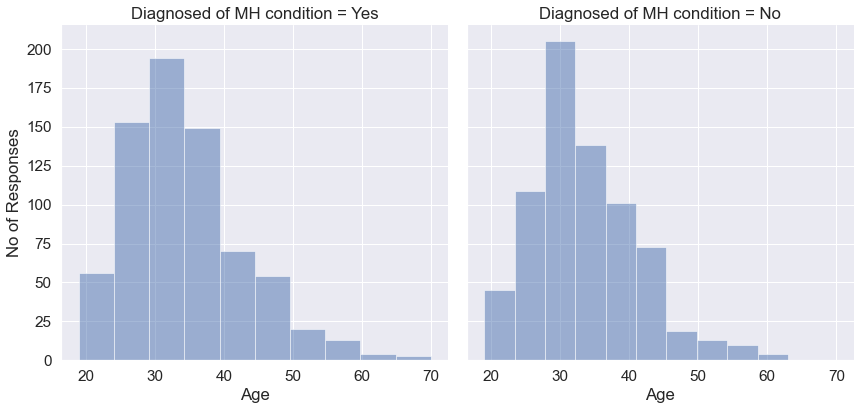

In [ ]:
# Histograms showing distribution of mental health status amongst employees of various ages

sns.set(font_scale = 1.4)
g = sns.FacetGrid(df,  col='Diagnosed of MH condition', size=6)
g.map(plt.hist, 'Age', alpha=0.5, bins=10)
g.set_ylabels('No of Responses')
plt.show()

In [ ]:
# Check for imbalance and distribution of Response Variable
# A Countplot showing distribution of Response Variable - Intention to Seek Treatment (fairly balanced)

plt.figure(figsize=(14,3))

g = sns.countplot(y="Seek Treatment", data=df, order=[1,0],
                    palette=['#257899' , '#60a4bf'])
plt.title('Countplot showing distribution of Target Variable - Intention to Seek Treatment ')
g.set_yticklabels(['Yes', 'No'])
plt.xlabel('Number of Responses')
plt.ylabel('Seek Treatment')

NameError: ignored

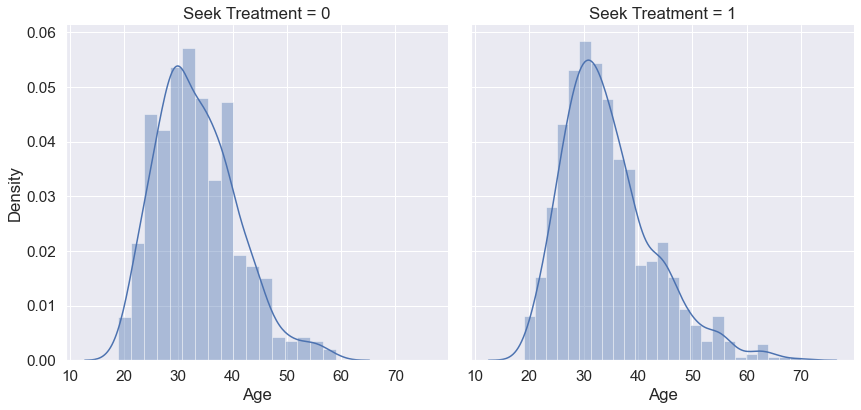

In [ ]:
# Density plots showing fairly normal distribution of the Response Variable ('Seek Treatment') with a tail to the right
# Response Variable 'Seek Treatment' ([0="No"], [1="Yes"])

sns.set(font_scale = 1.4)
g = sns.FacetGrid(df, col='Seek Treatment', size=6)
g = g.map(sns.distplot, "Age")
g.set_ylabels('Density')

Text(0, 0.5, 'Seek Treatment')

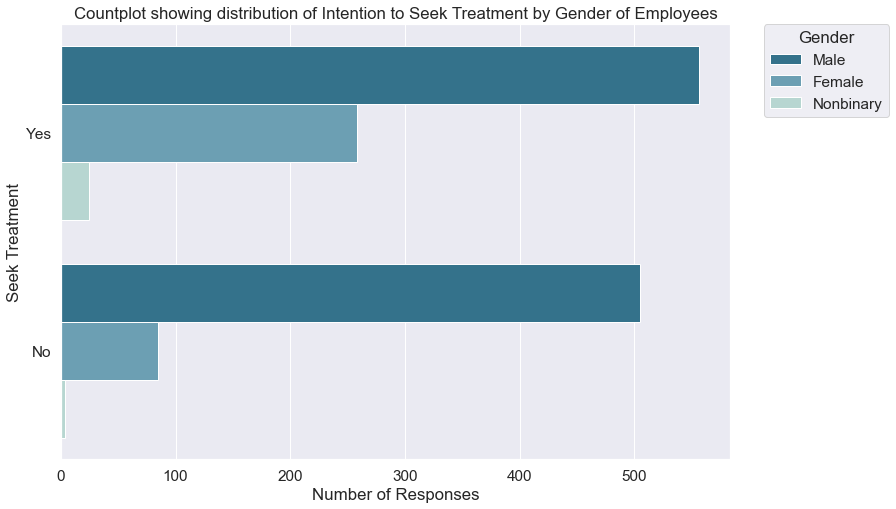

In [ ]:
# A Countplot showing distribution of Response Variable - Intention to Seek Treatment by Gender Types of Employees


plt.figure(figsize=(12,8))


g = sns.countplot(y="Seek Treatment", hue="Gender", data=df, order=[1,0],
                    palette=['#257899' , '#60a4bf', '#b2dbd4'])
plt.title('Countplot showing distribution of Intention to Seek Treatment by Gender of Employees')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
g.set_yticklabels(['Yes', 'No'])
plt.xlabel('Number of Responses')
plt.ylabel('Seek Treatment')


The countplot showing distribution of Response Variable - **'Intention to Seek Treatment' by Gender Types of Employees**, shows that the decision to seek treatment is not really determined by the gender type of the employees.

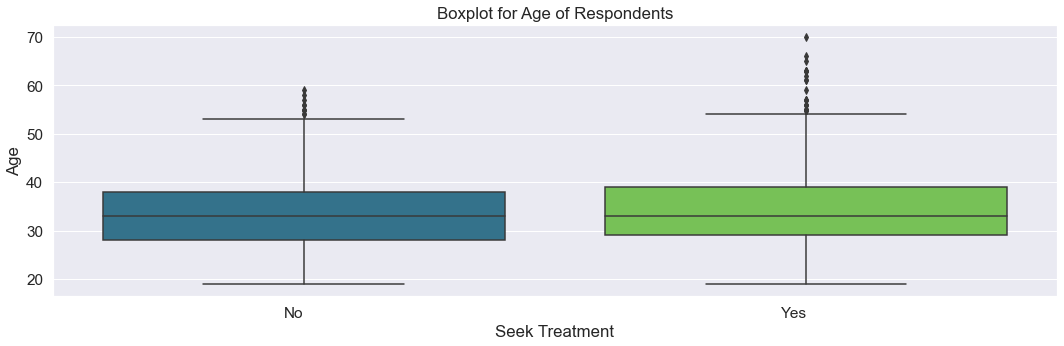

In [ ]:
# Boxplot for Age of Respondents

plt.figure(figsize = (18,5))

g = sns.boxplot(x = "Seek Treatment", y = "Age", data = df, palette=['#257899' , '#70D345'])
plt.title('Boxplot for Age of Respondents')
age = str(df['Age'].describe().round(2))
g.set_xticklabels(['No', 'Yes'],  ha="right")
plt.show()

**Boxplot for Age of Respondents** shows there is not much difference in the distribution of the age for the two types of responses

### Exploratory Data Analysis of research question: 'Does your employer provide mental health benefits as part of healthcare coverage?'

Text(0, 0.5, 'Types of Responses')

<Figure size 1440x360 with 0 Axes>

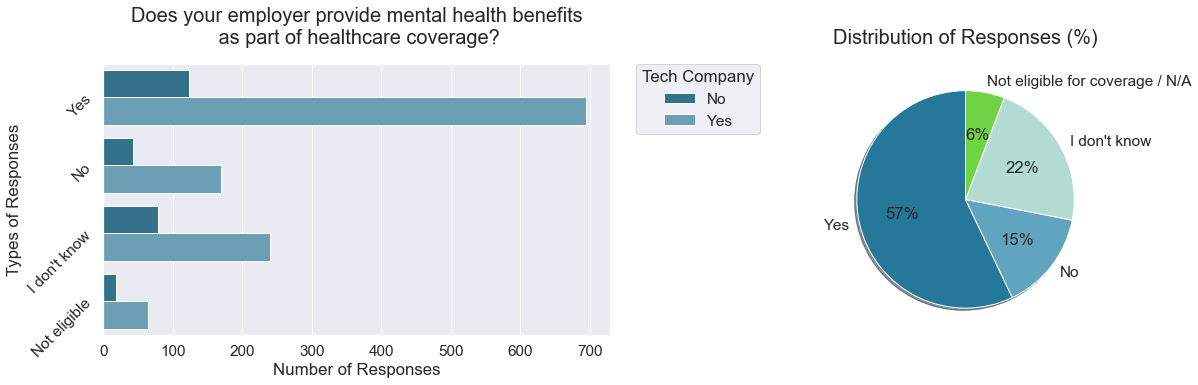

In [ ]:

# Layout of Barchart and Pie Chart

plt.figure(figsize = (20,5))
fig, (ax1, ax) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0.2)


# Pie Charts showing distribution of responses to research question

Benefits_Provided = df['Benefits'].value_counts()['Yes']
Benefits_NotProvided = df['Benefits'].value_counts()['No']
Benefits_NotKnown = df['Benefits'].value_counts()['I don\'t know']
Benefits_NotEligible = df['Benefits'].value_counts()['Not eligible for coverage / N/A']

labels = 'Yes', 'No', 'I don\'t know', 'Not eligible for coverage / N/A'
sizes = [Benefits_Provided, Benefits_NotProvided, Benefits_NotKnown, Benefits_NotEligible]
explode = (0.5, 0, 0, 0)
colors = [ '#257899' , '#60a4bf', '#b2dbd4', '#70D345']

ax.pie(sizes, labels=labels, autopct='%0.0f%%', shadow=True, colors=colors, startangle=90)
ax.set_aspect('equal')
ax.set_title('Distribution of Responses (%)', pad = 20, fontsize = 20)


# Barplots showing distribution of responses to research question according to type of workplace

g = sns.countplot(y='Benefits',
                 hue='Tech company', data=df, 
                  order=['Yes', 'No',
                        'I don\'t know', 'Not eligible for coverage / N/A'] , 
                  palette=['#257899' , '#60a4bf', '#b2dbd4', '#70D345'], ax = ax1)
ax1.set_yticklabels(['Yes', 'No', 'I don\'t know', 'Not eligible'], rotation=45, ha="right")
ax1.set_title('Does your employer provide mental health benefits\n as part of healthcare coverage?'
              , pad = 20, fontsize = 20)
ax1.legend(["No", "Yes"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Tech Company')
ax1.set_xlabel('Number of Responses')
ax1.set_ylabel('Types of Responses')


Analysis of responses to the research question '**Does your employer provide mental health benefits as part of healthcare coverage?**' showed that majority of employees in Tech Companies had access to mental health benefits. It also shows that for employees generally, 57% of them had access to mental health benefits as part of healthcare coverage. 15% did not have access to it. 6% were not eligible. While 22% were not sure if they had access to benefits.


### Exploartory Data Analysis of research question: 'Has your employer ever formally discussed mental health  (for example, as part of a wellness campaign or other official communication)?' 

Text(0, 0.5, 'Types of Responses')

<Figure size 1440x360 with 0 Axes>

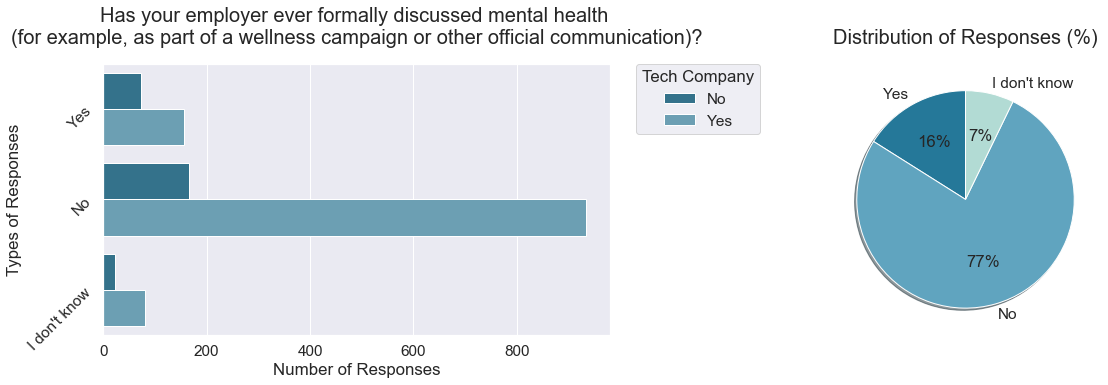

In [ ]:

# Layout of Barchart and Pie Chart

plt.figure(figsize = (20,5))
fig, (ax1, ax) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0.2)


# Pie Charts showing distribution of responses to research question

WellnessProgram_Provided = df['Wellness program'].value_counts()['Yes']
WellnessProgram_NotProvided = df['Wellness program'].value_counts()['No']
WellnessProgram_NotKnown = df['Wellness program'].value_counts()['I don\'t know']


labels = 'Yes', 'No', 'I don\'t know'
sizes = [WellnessProgram_Provided, WellnessProgram_NotProvided, WellnessProgram_NotKnown]
explode = (0.5, 0, 0)
colors = [ '#257899' , '#60a4bf', '#b2dbd4']

ax.pie(sizes, labels=labels, autopct='%0.0f%%', shadow=True, colors=colors, startangle=90)
ax.set_aspect('equal')
ax.set_title('Distribution of Responses (%)', pad = 20, fontsize = 20)


# Barplots showing distribution of responses to research question according to type of workplace

g = sns.countplot(y='Wellness program',
                 hue='Tech company', data=df, 
                  order=['Yes', 'No',
                        'I don\'t know'] , 
                  palette=['#257899' , '#60a4bf', '#b2dbd4'], ax = ax1)
ax1.set_yticklabels(['Yes', 'No', 'I don\'t know'], rotation=45, ha="right")
ax1.set_title(
'Has your employer ever formally discussed mental health \n(for example, as part of a wellness campaign or other official communication)?'
, pad = 20, fontsize = 20)
ax1.legend(["No", "Yes"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Tech Company')
ax1.set_xlabel('Number of Responses')
ax1.set_ylabel('Types of Responses')

Analysis of responses to the research question '**Has your employer ever formally discussed mental health 
(for example, as part of a wellness campaign or other official communication)?**' showed that majority of the employees that confirmed that their employers do not have a wellness program also confirmed that their employers were Tech Companies. It appears that though the Tech Companies provide mental health benefits, they do not have a wellness program in place for employees. It also shows that for 77% of the employees generally their employer had no mental health awareness or wellness program in place. 16% of the employees had access to a wellness program in their workplace. While 7% were not sure if they had the program in place at their workplace.

### Exploartory Data Analysis of research question: 'Do you have a family history of mental illness?'


Text(0, 0.5, 'Types of Responses')

<Figure size 1440x360 with 0 Axes>

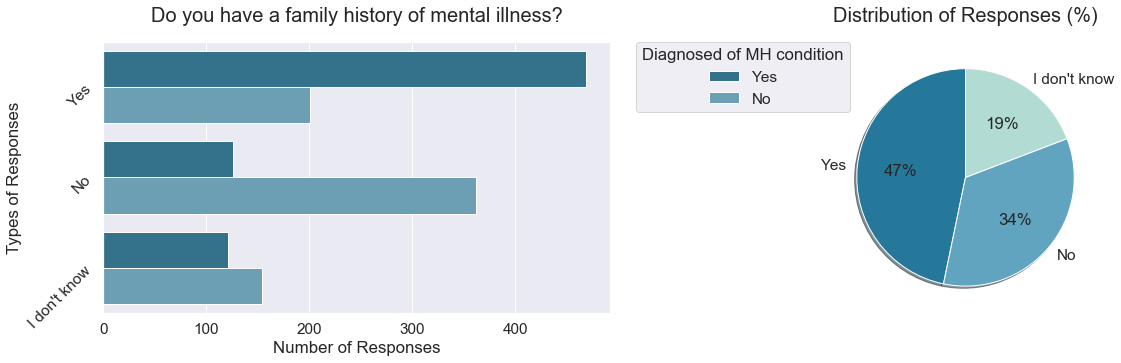

In [ ]:
# Layout of Barchart and Pie Chart

plt.figure(figsize = (20,5))
fig, (ax1, ax) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0.2)


# Pie Charts showing distribution of responses to research question

FamilyHist_Yes = df['Family History of MH'].value_counts()['Yes']
FamilyHist_No = df['Family History of MH'].value_counts()['No']
FamilyHist_NotKnown = df['Family History of MH'].value_counts()['I don\'t know']


labels = 'Yes', 'No', 'I don\'t know'
sizes = [FamilyHist_Yes, FamilyHist_No, FamilyHist_NotKnown]
explode = (0.5, 0, 0)
colors = [ '#257899' , '#60a4bf', '#b2dbd4']

ax.pie(sizes, labels=labels, autopct='%0.0f%%', shadow=True, colors=colors, startangle=90)
ax.set_aspect('equal')
ax.set_title('Distribution of Responses (%)', pad = 20, fontsize = 20)


# Barplots showing distribution of responses to research question in relation to if they have been diagnosed 
# of a mental health condition

g = sns.countplot(y='Family History of MH',
                 hue='Diagnosed of MH condition', data=df, 
                  order=['Yes', 'No',
                        'I don\'t know'] , 
                  palette=['#257899' , '#60a4bf', '#b2dbd4'], ax = ax1)
ax1.set_yticklabels(['Yes', 'No', 'I don\'t know'], rotation=45, ha="right")
ax1.set_title('Do you have a family history of mental illness?', pad = 20, fontsize = 20)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Diagnosed of MH condition')
ax1.set_xlabel('Number of Responses')
ax1.set_ylabel('Types of Responses')

Analysis of responses to the research question '**Do you have a family history of mental illness?**' showed that more people who have a family history of mental health condition have been diagnosed of a condition. It also shows that 47% of the employees had a family history of mental illness. 19% were not sure. While 34% answered that they had no family history of mental illness.

### Exploartory Data Analysis of research question: 'Do you think that discussing a mental health disorder with your employer would have negative consequences?'

Text(0, 0.5, 'Number of Responses')

<Figure size 1440x360 with 0 Axes>

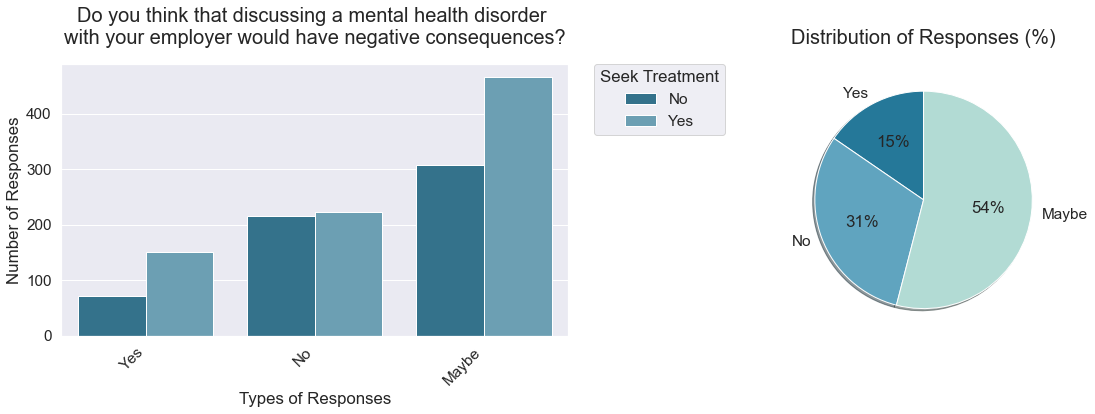

In [ ]:
# Layout of Barchart and Pie Chart

plt.figure(figsize = (20,5))
fig, (ax1, ax) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0.2)


# Pie Charts showing distribution of responses to research question
# 'Do you think that discussing a mental health disorder with your employer would have negative consequences?' 

MHConsequence_Yes = df['Ment health consequence'].value_counts()['Yes']
MHConsequence_No = df['Ment health consequence'].value_counts()['No']
MHConsequence_NotKnown = df['Ment health consequence'].value_counts()['Maybe']


labels = 'Yes', 'No', 'Maybe'
sizes = [MHConsequence_Yes, MHConsequence_No, MHConsequence_NotKnown]
explode = (0.5, 0, 0)
colors = [ '#257899' , '#60a4bf', '#b2dbd4']

ax.pie(sizes, labels=labels, autopct='%0.0f%%', shadow=True, colors=colors, startangle=90)
ax.set_aspect('equal')
ax.set_title('Distribution of Responses (%)', pad = 20, fontsize = 20)


# Barplots showing distribution of responses to research question
# 'Do you think that discussing a mental health disorder with your employer would have negative consequences?' 
#  according to gender of repondents

g = sns.countplot(x='Ment health consequence',
                 hue='Seek Treatment', data=df, 
                  order=['Yes', 'No',
                        'Maybe'] , 
                  palette=['#257899' , '#60a4bf', '#b2dbd4'], ax = ax1)
ax1.set_xticklabels(['Yes', 'No', 'Maybe'], rotation=45, ha="right")
ax1.set_title('Do you think that discussing a mental health disorder \nwith your employer would have negative consequences?'
              , pad = 20, fontsize = 20)
ax1.legend(["No", "Yes"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Seek Treatment')
ax1.set_xlabel('Types of Responses')
ax1.set_ylabel('Number of Responses')

Analysis of responses to the research question '**Do you think that discussing a mental health disorder with your employer would have negative consequences?**' showed that 54% felt maybe it could have negative consequenses. 15% felt yes it will have negative consequenses. While 31% felt that it will not have negative consequenses. Of about 214 employees that felt that discussing a mental health disorder with their employer would have negative consequences about 70 of them were not willing to seek treatment. This empasizes the concern that more mental health awareness program needs to be encouraged in the tech industry.

### Exploartory Data Analysis of research question: ''Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"

Text(0, 0.5, 'Number of Responses')

<Figure size 1440x360 with 0 Axes>

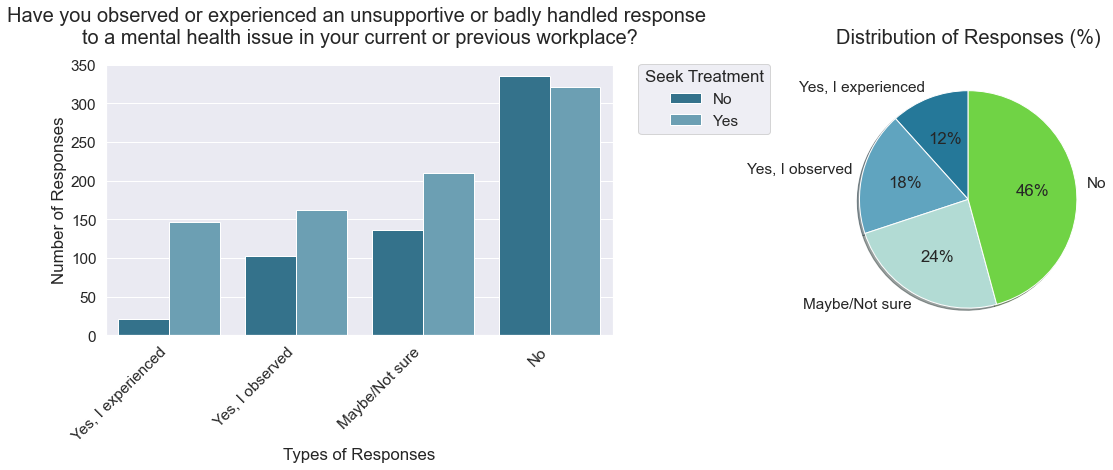

In [ ]:
# Layout of Barchart and Pie Chart

plt.figure(figsize = (20,5))
fig, (ax1, ax) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0.2)


# Pie Charts showing distribution of responses to research question
# 'Have you observed or experienced an unsupportive or 
# badly handled response to a mental health issue in your current or previous workplace?' 

BadMHExp_YesExp = df['Bad MH Experience'].value_counts()['Yes, I experienced']
BadMHExp_YesObs = df['Bad MH Experience'].value_counts()['Yes, I observed']
BadMHExp_Maybe = df['Bad MH Experience'].value_counts()['Maybe/Not sure']
BadMHExp_No = df['Bad MH Experience'].value_counts()['No']


labels = 'Yes, I experienced', 'Yes, I observed', 'Maybe/Not sure', 'No'
sizes = [BadMHExp_YesExp, BadMHExp_YesObs, BadMHExp_Maybe, BadMHExp_No]
explode = (0.5, 0, 0, 0)
colors = [ '#257899' , '#60a4bf', '#b2dbd4', '#70D345']

ax.pie(sizes, labels=labels, autopct='%0.0f%%', shadow=True, colors=colors, startangle=90)
ax.set_aspect('equal')
ax.set_title('Distribution of Responses (%)', pad = 20, fontsize = 20)


# Barplots showing distribution of responses to research question
# 'Have you observed or experienced an unsupportive or 
# badly handled response to a mental health issue in your current or previous workplace?'  according to treatment intent

g = sns.countplot(x='Bad MH Experience',
                 hue='Seek Treatment', data=df, 
                  order=['Yes, I experienced', 'Yes, I observed', 'Maybe/Not sure', 'No'] , 
                  palette=[ '#257899' , '#60a4bf', '#b2dbd4', '#70D345'], ax = ax1)
ax1.set_xticklabels(['Yes, I experienced', 'Yes, I observed', 'Maybe/Not sure', 'No'], rotation=45, ha="right")
ax1.set_title(
'Have you observed or experienced an unsupportive or badly handled response \nto a mental health issue in your current or previous workplace?'
, pad = 20, fontsize = 20)
ax1.legend(["No", "Yes"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Seek Treatment')
ax1.set_xlabel('Types of Responses')
ax1.set_ylabel('Number of Responses')

Analysis of responses to the research question '**Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?**' showed that 12% of the employees had experienced badly handled response to a mental health issue in their place of work. 18% had observed it in their place of work. 46% had not experienced it. While 24% were ont sure if they had experienced it. A significant amount of employees that have observed it were not willing to seek treatment.

### Exploartory Data Analysis of research question: ''Do you currently have a mental health disorder?"

Text(0, 0.5, 'Number of Responses')

<Figure size 1440x360 with 0 Axes>

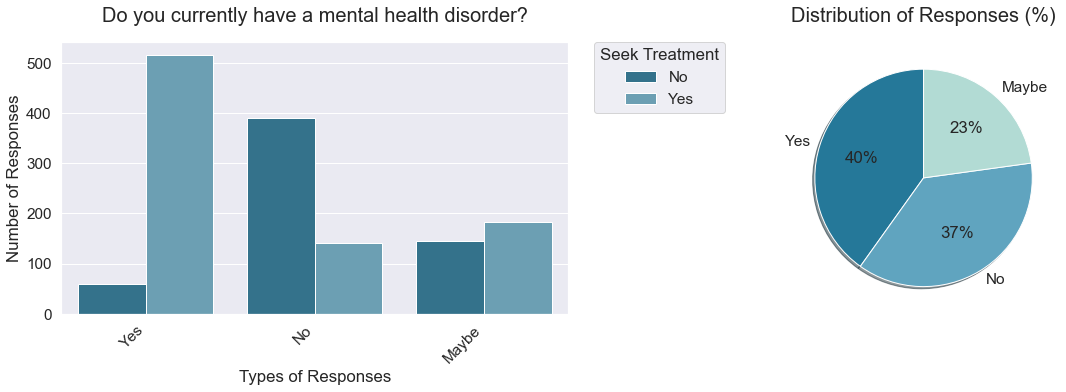

In [ ]:
# Layout of Barchart and Pie Chart

plt.figure(figsize = (20,5))
fig, (ax1, ax) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0.2)


# Pie Charts showing distribution of responses to research question
# 'Do you currently have a mental health disorder?' 
#

CurrentMHDisorder_Yes = df['Current Ment Health Disorder'].value_counts()['Yes']
CurrentMHDisorder_No = df['Current Ment Health Disorder'].value_counts()['No']
CurrentMHDisorder_NotKnown = df['Current Ment Health Disorder'].value_counts()['Maybe']


labels = 'Yes', 'No', 'Maybe'
sizes = [CurrentMHDisorder_Yes, CurrentMHDisorder_No, CurrentMHDisorder_NotKnown]
explode = (0.5, 0, 0)
colors = [ '#257899' , '#60a4bf', '#b2dbd4']

ax.pie(sizes, labels=labels, autopct='%0.0f%%', shadow=True, colors=colors, startangle=90)
ax.set_aspect('equal')
ax.set_title('Distribution of Responses (%)', pad = 20, fontsize = 20)


# Barplots showing distribution of responses to research question
# 'Do you currently have a mental health disorder?' according to treatment intent of repondents

g = sns.countplot(x='Current Ment Health Disorder',
                 hue='Seek Treatment', data=df, 
                  order=['Yes', 'No',
                        'Maybe'] , 
                  palette=['#257899' , '#60a4bf', '#b2dbd4'], ax = ax1)
ax1.set_xticklabels(['Yes', 'No', 'Maybe'], rotation=45, ha="right")
ax1.set_title('Do you currently have a mental health disorder?', pad = 20, fontsize = 20)
ax1.legend(["No", "Yes"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Seek Treatment')
ax1.set_xlabel('Types of Responses')
ax1.set_ylabel('Number of Responses')

Analysis of responses to the research question '**Do you currently have a mental health disorder?**' showed that 40% of the employees had a mental health condition. 23% were not sure if they had a mental health disorder. While 37% answered that they had no mental heath disorder. Of about 573 employees that answered that they had a mental health condition about 50 of them were not willing to seek treatment.

## 4. Feature Extraction

In [ ]:
# Encoding the categorical variables with label encoder

df = df.copy()

CategoricalVariables = ['No employees','Benefits','Care options','Wellness program',
               'Ment health resources','Anonimity','Sick leave access','Ment health consequence','Phys health consequence',
               'Coworkers','Supervisor','Mental vs Physical','Obs consequence','Prev Ment health benefits',
               'Prev Ment health options','Prev wellness program','Prev Ment health resources','Prev Anonimity',
               'Prev Ment health consequence','Prev Phys health consequence','Prev Coworkers','Prev Supervisor',
               'Prev Mental vs Physical','Prev Obs consequence','Phys health interview',
               'Ment health interview','Ment health on career','Ment health on co-workers',
               'Reveal MH to friends','Bad MH Experience','Family History of MH','Past Ment Health Disorder',
               'Current Ment Health Disorder','Diagnosed of MH condition','Work Interference - Treated',
               'Work Interference - Not treated','Gender','Work Position','Remote Work']

encoder = LabelEncoder()
for col in CategoricalVariables:
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])
    
    
df.head()

,Self employed,No employees,Tech company,Benefits,Care options,Wellness program,Ment health resources,Anonimity,Sick leave access,Ment health consequence,...,Past Ment Health Disorder,Current Ment Health Disorder,Diagnosed of MH condition,Seek Treatment,Work Interference - Treated,Work Interference - Not treated,Age,Gender,Work Position,Remote Work
0,0,2,1.0,2,1,1,1,0,5,1,...,2,1,1,0,1,1,39,1,0,2
1,0,4,1.0,1,2,2,2,2,3,1,...,2,2,1,1,3,4,29,1,8,1
2,0,4,1.0,1,1,1,1,0,1,0,...,0,1,0,1,1,1,38,1,0,0
3,1,2,1.0,3,1,1,1,0,3,0,...,2,2,1,1,4,4,43,1,205,2
4,0,4,0.0,3,2,1,1,1,1,2,...,2,2,1,1,4,4,43,0,87,2


In [ ]:
#Check data types of features to confirm they are prepared for training
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Self employed                    1433 non-null   object
 1   No employees                     1433 non-null   int32 
 2   Tech company                     1433 non-null   object
 3   Benefits                         1433 non-null   int32 
 4   Care options                     1433 non-null   int32 
 5   Wellness program                 1433 non-null   int32 
 6   Ment health resources            1433 non-null   int32 
 7   Anonimity                        1433 non-null   int32 
 8   Sick leave access                1433 non-null   int32 
 9   Ment health consequence          1433 non-null   int32 
 10  Phys health consequence          1433 non-null   int32 
 11  Coworkers                        1433 non-null   int32 
 12  Supervisor                       1

In [ ]:
# Converting object - mixed type features to proper numeric data type

NumericVariables = ['Self employed', 'Tech company','Prev Employer', 'Age', 'Seek Treatment']
df[NumericVariables] = df[NumericVariables].astype('int')
df.dtypes

Self employed                      int32
No employees                       int32
Tech company                       int32
Benefits                           int32
Care options                       int32
Wellness program                   int32
Ment health resources              int32
Anonimity                          int32
Sick leave access                  int32
Ment health consequence            int32
Phys health consequence            int32
Coworkers                          int32
Supervisor                         int32
Mental vs Physical                 int32
Obs consequence                    int32
Prev Employer                      int32
Prev Ment health benefits          int32
Prev Ment health options           int32
Prev wellness program              int32
Prev Ment health resources         int32
Prev Anonimity                     int32
Prev Ment health consequence       int32
Prev Phys health consequence       int32
Prev Coworkers                     int32
Prev Supervisor 

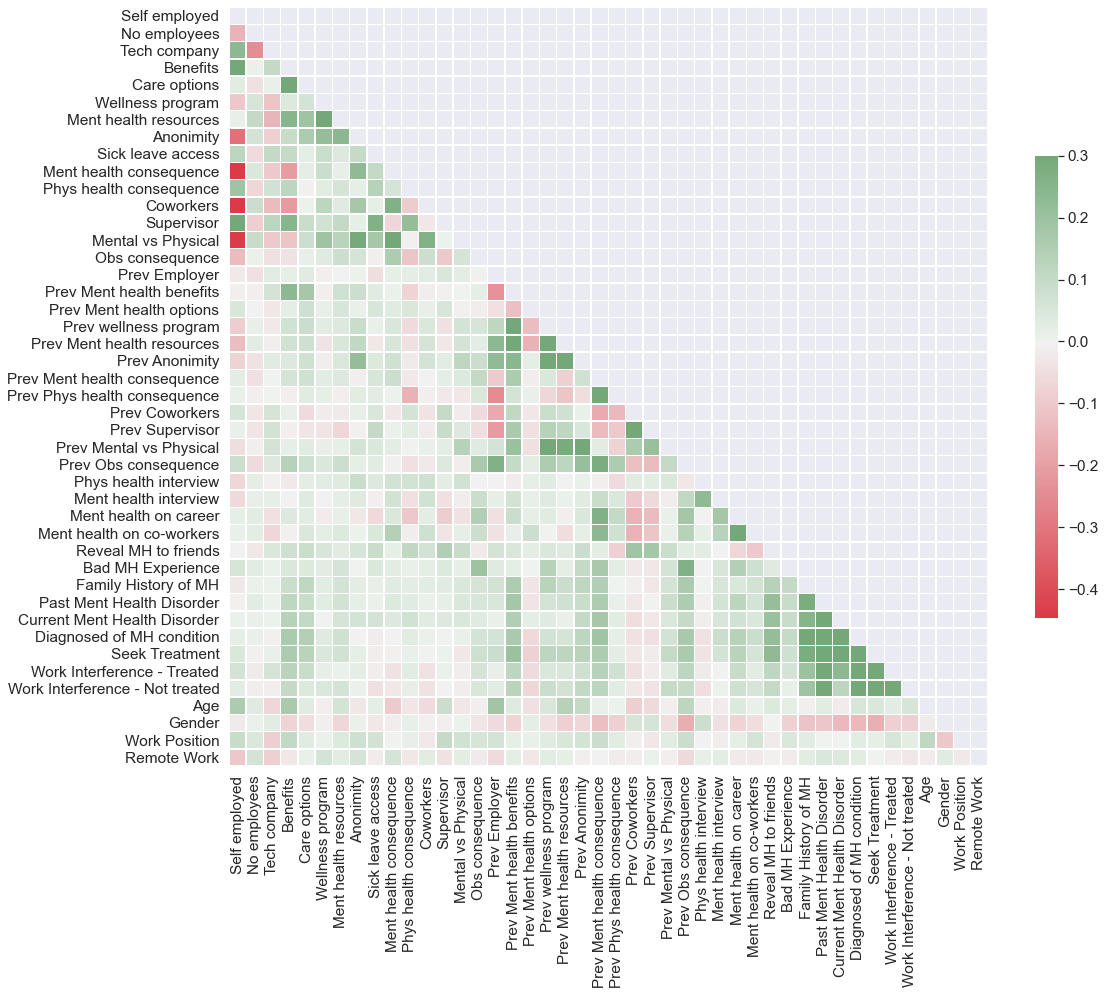

In [ ]:
# Cheking corellation of variables
# Positively correlated variables shown in green while negatively correlated variable are shown in red

corr = df.corr(method ='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(17, 17))
cmap = sns.diverging_palette(10, 130, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

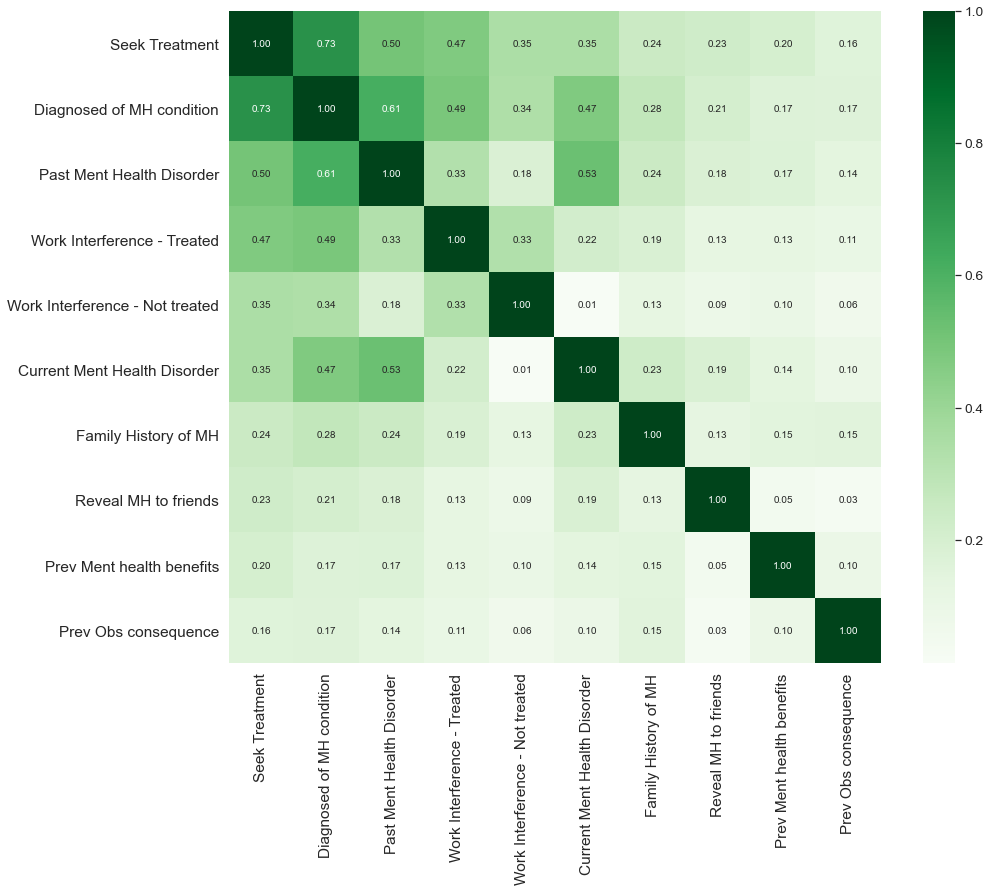

In [ ]:
# Heatmap showing 'Seek Treatment' correlation matrix for top ten correlating variables
# 'Seek Treatment' is our target variable
# High positive correlation of 0.73 noticed between the variable 'Dignosed of MH Condition' and the target variable

k = 10 
f, ax = plt.subplots(figsize=(15, 12))
cols = df.corr().nlargest(k, 'Seek Treatment')['Seek Treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
cmap = "Greens"
hm = sns.heatmap(cm, cbar=True, cmap=cmap, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# Dataframe separated into input and target variables

X = df.drop(['Seek Treatment'],axis=1).values
y = df['Seek Treatment'].values


In [ ]:
#Standard Scaler is used to scale the data in preparation for Dimensionality Reduction

StdScaler = StandardScaler()

X_scaled = StdScaler.fit_transform(X)

#Check dimensionality of data before applying Dimensionality Reduction
X_scaled.shape

(1433, 43)

In [ ]:
# Separate train and test data
# The dataset is first split into train and test sets before applying PCA on the train set
# so that the test set is not exposed to any algorithm which might help in predicting the target variable 

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=100)

In [ ]:
# Apply PCA for dimensionality reduction to reduce multicollinearity
# PCA is specified to keep 95% of variance and figure out the best number of n_components

pca = PCA(0.95)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test) # X_test is transformed in preparation for preidiction and accuracy tests

print(X_train_pca.shape)
print(X_test_pca.shape)

(960, 37)
(473, 37)


## 5. Model Training and Evaluation

# Supervised Learning

### Model Preparation

In [ ]:
#Model Evaluation (8 Models were evaluated for best performance)


# Collating model parameters 
model_params = {
    'Stochastic Gradient Descent': {
        'model': SGDClassifier(loss='log'),
        'params' : {
            'max_iter': [2,5,10]
        }  
    },
    'Logistic Regression' : {
        'model': LogisticRegression(solver='lbfgs', multi_class='multinomial'),
        'params': {
            'C': [1,3,5]
        }
    },
    'K Nearest Neighbours': {
        'model': KNeighborsClassifier(weights ='uniform'),
        'params' : {
            'n_neighbors': [10,15,20]   
        }  
    },
    'Support Vector Machines': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,50,100]
        }
    },
    'Decision Tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [2,5,10]
        }
    },
    'XGBoost' : {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [5,10,20]
        }
    }
}



### Experiment 1: Comparison of Scores from Models with default KFold Cross Validation

Stochastic Gradient Descent: [Scores_Mean: 0.819424 ; Scores_Std:0.018040]
Logistic Regression: [Scores_Mean: 0.854657 ; Scores_Std:0.018832]
K Nearest Neighbours: [Scores_Mean: 0.818158 ; Scores_Std:0.022653]
Support Vector Machines: [Scores_Mean: 0.859065 ; Scores_Std:0.008370]
Random Forest: [Scores_Mean: 0.841625 ; Scores_Std:0.015871]
Decision Tree: [Scores_Mean: 0.798686 ; Scores_Std:0.029176]
XGBoost: [Scores_Mean: 0.839033 ; Scores_Std:0.014653]


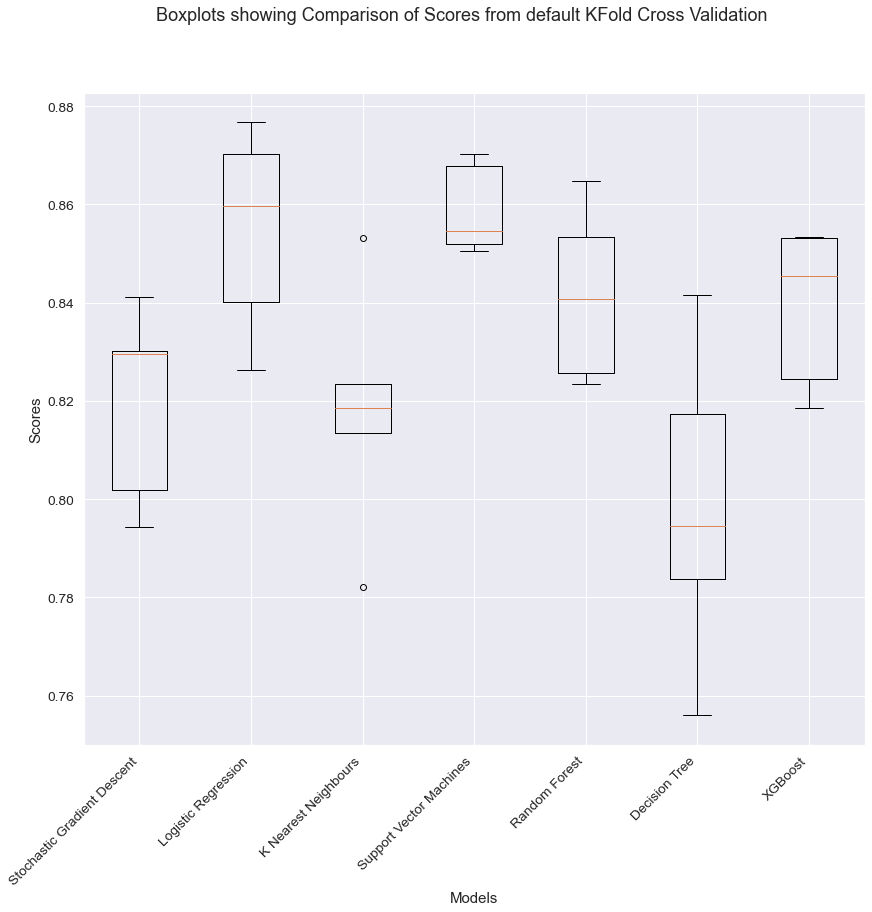

In [ ]:
# Comparison of Scores from Models with default KFold Cross Validation (cv=None)
# scoring parameter: 'f1' (Considering Binary Target)


results = []
names = []
scoring = 'f1' 

for model_name, mp in model_params.items():
    cv_results = model_selection.cross_val_score(mp['model'], X_train_pca, y_train, cv=None, scoring=scoring)
    results.append(cv_results)
    names.append(model_name)
    output = "%s: [Scores_Mean: %f ; Scores_Std:%f]" % (model_name, cv_results.mean(), cv_results.std())
    print(output)
    
    
# boxplots for model comparison 

fig = plt.figure(figsize=(14,12))
fig.suptitle('Boxplots showing Comparison of Scores from default KFold Cross Validation')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45, ha="right")
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()

### Experiment 2: Comparison of Scores from Models with Repeated Stratified K-Fold Cross Validation

Stochastic Gradient Descent: [Scores_Mean: 0.800569 ; Scores_Std:0.034154]
Logistic Regression: [Scores_Mean: 0.857104 ; Scores_Std:0.023211]
K Nearest Neighbours: [Scores_Mean: 0.818777 ; Scores_Std:0.025131]
Support Vector Machines: [Scores_Mean: 0.861301 ; Scores_Std:0.020923]
Random Forest: [Scores_Mean: 0.847672 ; Scores_Std:0.021692]
Decision Tree: [Scores_Mean: 0.774274 ; Scores_Std:0.024715]
XGBoost: [Scores_Mean: 0.845545 ; Scores_Std:0.025127]


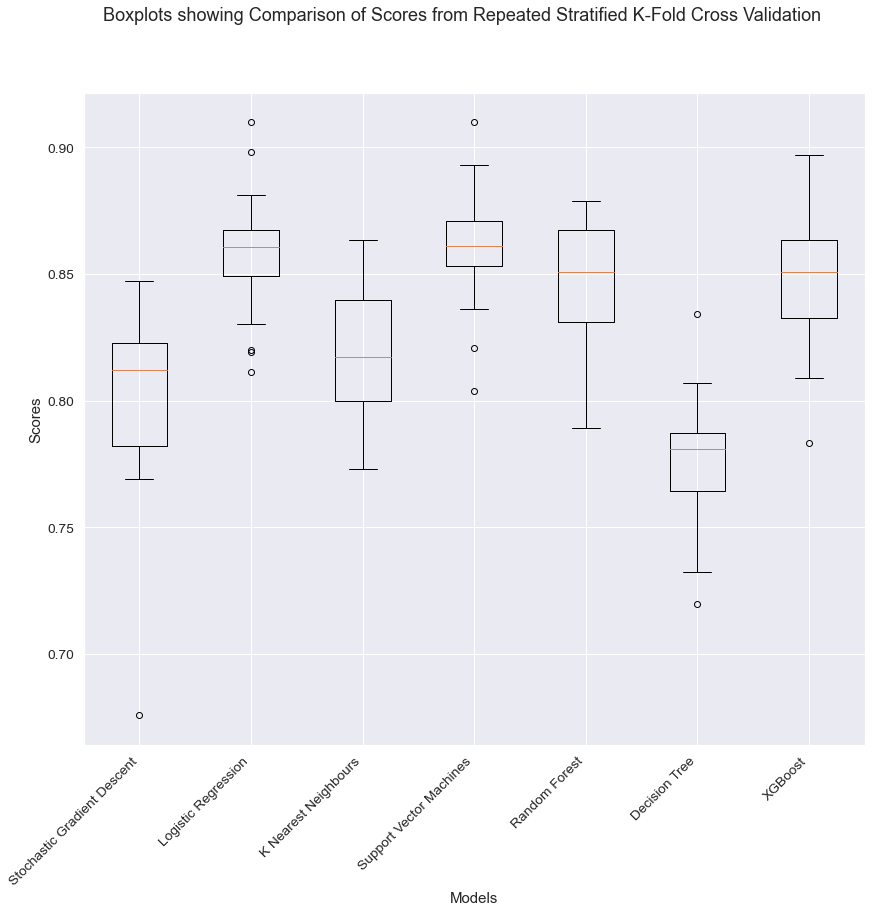

In [ ]:
# Comparison of Scores from Models with Repeated Stratified K-Fold Cross Validation
# Repeats Stratified K-Fold n times with different randomization in each repetition


results = []
names = []
scoring = 'f1' 

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

for model_name, mp in model_params.items():
    cv_results = model_selection.cross_val_score(mp['model'], X_train_pca, y_train, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(model_name)
    output = "%s: [Scores_Mean: %f ; Scores_Std:%f]" % (model_name, cv_results.mean(), cv_results.std())
    print(output)
    
    
# boxplots for model comparison 

fig = plt.figure(figsize=(14,12))
fig.suptitle('Boxplots showing Comparison of Scores from Repeated Stratified K-Fold Cross Validation')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45, ha="right")
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()

### Experiment 3: Apply Hyperparameter Tuning using GridSearchCV and Repeated KFold Cross Validation

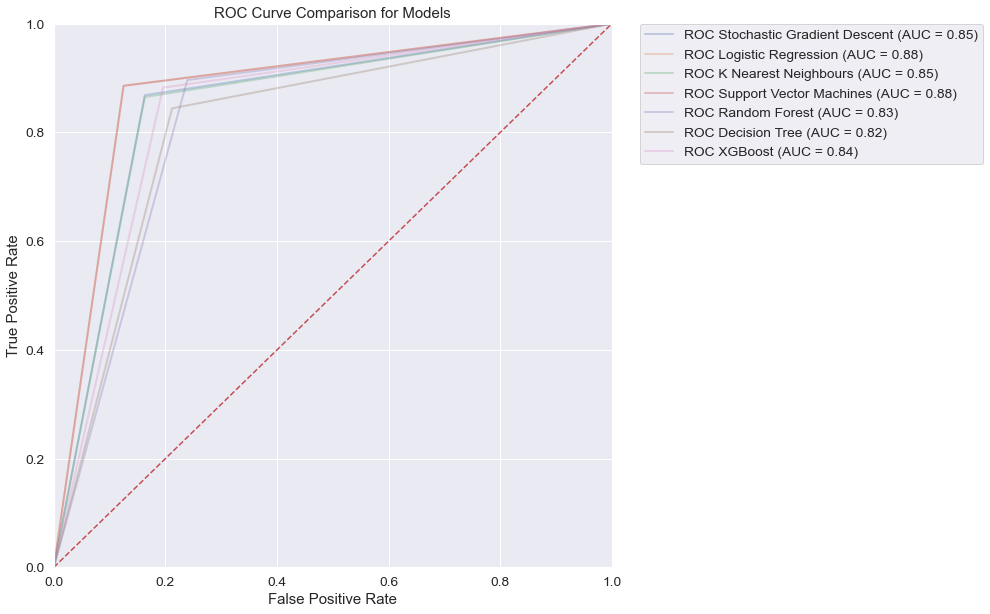

In [ ]:
# Apply Hyperparameter Tuning using GridSearchCV and Repeated KFold Cross Validation on Models 


best_params = []
model_columns = []
model_compare = pd.DataFrame(columns = model_columns)
row_index = 0
scoring = 'f1' 
fig = plt.figure(figsize=(10,10))

# Specify Repeated KFold Cross Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

#Apply GridsearchCV and Collate Metrics for Evaluating Models
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False, scoring=scoring)
    predictions = clf.fit(X_train_pca,y_train).predict(X_test_pca)
    
    # Collate Metrics for Evaluating Models
    
    best_params.append({
        'ModelName': model_name,
        'BestParams': clf.best_params_,
        'BestScore': clf.best_score_
    })
    fp, tp, th = roc_curve(y_test, predictions)
    classifier_name = model_name
    model_compare.loc[row_index,'ModelName'] = classifier_name
    model_compare.loc[row_index, 'TrainAccuracy'] = round(clf.score(X_train_pca, y_train), 6)
    model_compare.loc[row_index, 'TestAccuracy'] = round(clf.score(X_test_pca, y_test), 6)
    model_compare.loc[row_index, 'Precission'] = precision_score(y_test, predictions)
    model_compare.loc[row_index, 'Recall'] = recall_score(y_test, predictions)
    model_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    model_compare.loc[row_index, 'F1Score'] = f1_score(y_test, predictions)
    model_compare.loc[row_index, 'MCC'] = matthews_corrcoef(y_test, predictions)
    model_compare.loc[row_index, 'BestScore'] = clf.best_score_
    
    # Prepare plots for ROC
    
    roc_auc_clf = auc(fp, tp)
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (classifier_name, roc_auc_clf))
    
    row_index+=1
    

# Plots for ROC Curve comparison

plt.title('ROC Curve Comparison for Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

### Evaluating Model Performance with different Scoring Metrics

In [ ]:
# Print model performance and best hyperparameters

pfm = pd.DataFrame(best_params,columns=['ModelName','BestParams','BestScore']).sort_values(by=['BestScore'], ascending=False)
pfm.reset_index(drop=True, inplace=True)
pfm


,ModelName,BestParams,BestScore
0,Support Vector Machines,"{'C': 1, 'kernel': 'rbf'}",0.861301
1,Logistic Regression,{'C': 1},0.857104
2,XGBoost,{'n_estimators': 20},0.846872
3,Random Forest,{'n_estimators': 100},0.845095
4,K Nearest Neighbours,{'n_neighbors': 15},0.839756
5,Decision Tree,{'max_depth': 5},0.824467
6,Stochastic Gradient Descent,{'max_iter': 5},0.800986


In [ ]:
# Print other evaluation metrics for model comparism

model_compare.sort_values(by = ['BestScore'], ascending = False, inplace = True) 
model_compare.reset_index(drop=True, inplace=True)
model_compare

,ModelName,TrainAccuracy,TestAccuracy,Precission,Recall,AUC,F1Score,MCC,BestScore
0,Support Vector Machines,0.938476,0.901408,0.917563,0.885813,0.880407,0.901408,0.754107,0.861301
1,Logistic Regression,0.872827,0.901408,0.917563,0.885813,0.880407,0.901408,0.754107,0.857104
2,XGBoost,1.000000,0.879310,0.876289,0.882353,0.843350,0.879310,0.688087,0.846872
3,Random Forest,1.000000,0.875000,0.854785,0.896194,0.828532,0.875000,0.667605,0.845095
4,K Nearest Neighbours,0.859023,0.878735,0.892857,0.865052,0.851004,0.878735,0.696374,0.839756
5,Decision Tree,0.904587,0.853147,0.862191,0.844291,0.816167,0.853147,0.628832,0.824467
6,Stochastic Gradient Descent,0.849265,0.880702,0.893238,0.868512,0.852734,0.880702,0.700377,0.800986


In [ ]:
# Print classification report / F1 Score

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.80      0.81       184
           1       0.88      0.88      0.88       289

    accuracy                           0.85       473
   macro avg       0.84      0.84      0.84       473
weighted avg       0.85      0.85      0.85       473



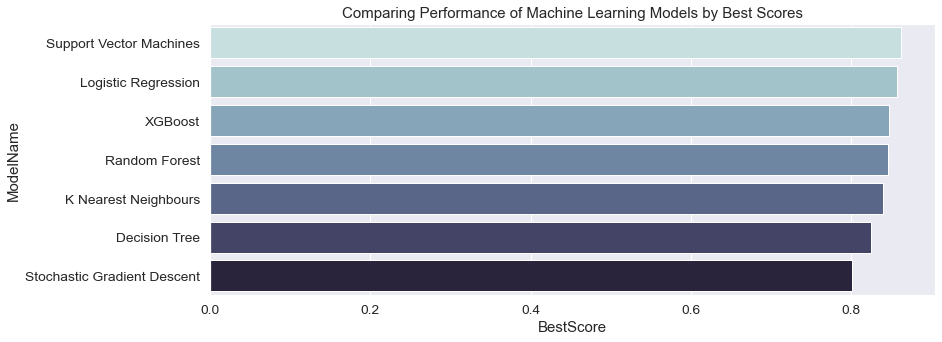

In [ ]:
# Creating plots to compare best scores of the models
plt.subplots(figsize=(13,5))
sns.barplot(x="BestScore", y="ModelName",data=model_compare,palette="ch:start=.2,rot=-.3"
            , order=model_compare.sort_values('BestScore',ascending = False).ModelName)
plt.title('Comparing Performance of Machine Learning Models by Best Scores')
plt.show()

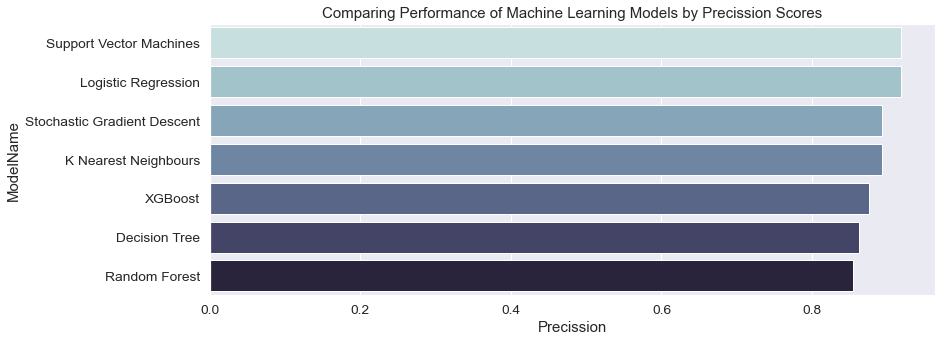

In [ ]:
# Creating plots to compare precission of the models
plt.subplots(figsize=(13,5))
sns.barplot(x="Precission", y="ModelName",data=model_compare,palette="ch:start=.2,rot=-.3"
            , order=model_compare.sort_values('Precission',ascending = False).ModelName)
plt.title('Comparing Performance of Machine Learning Models by Precission Scores')
plt.show()

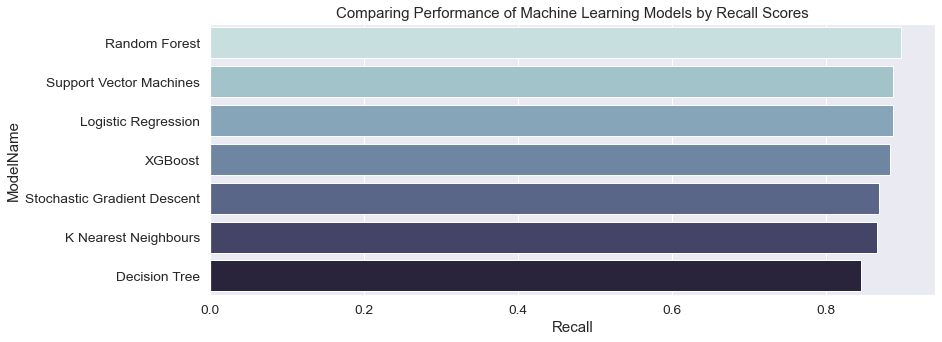

In [ ]:
# Creating plots to compare recall scores of the models
plt.subplots(figsize=(13,5))
sns.barplot(x="Recall", y="ModelName",data=model_compare,palette="ch:start=.2,rot=-.3"
            , order=model_compare.sort_values('Recall',ascending = False).ModelName)
plt.title('Comparing Performance of Machine Learning Models by Recall Scores')
plt.show()

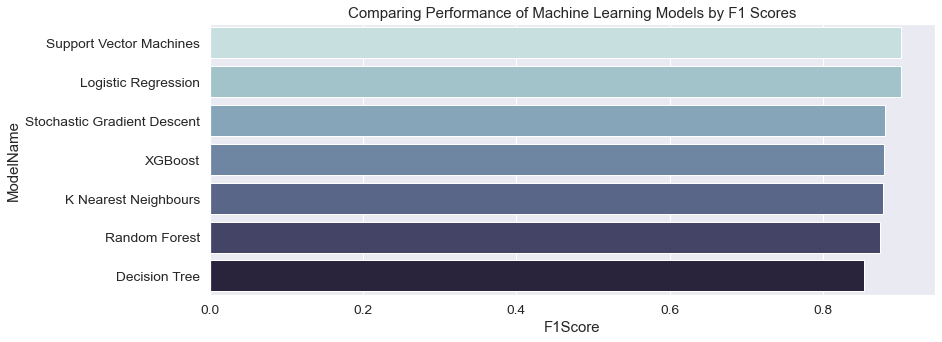

In [ ]:
# Creating plots to compare F1 scores of the models
plt.subplots(figsize=(13,5))
sns.barplot(x="F1Score", y="ModelName",data=model_compare,palette="ch:start=.2,rot=-.3"
            , order=model_compare.sort_values('F1Score',ascending = False).ModelName)
plt.title('Comparing Performance of Machine Learning Models by F1 Scores')
plt.show()

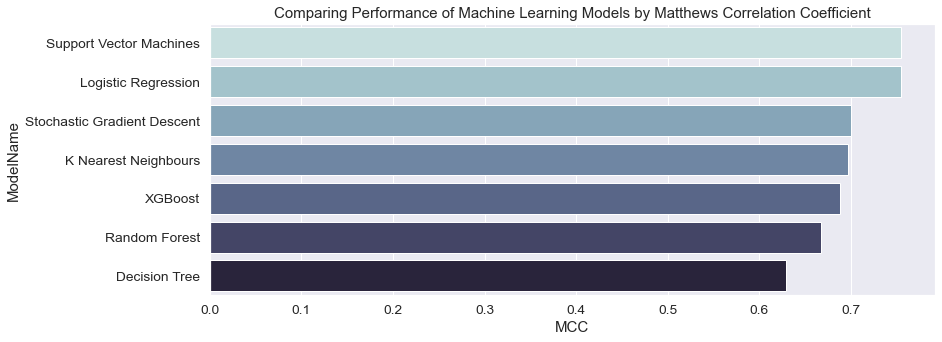

In [ ]:
# Creating plots to compare Matthews Correlation Coefficient of the models
plt.subplots(figsize=(13,5))
sns.barplot(x="MCC", y="ModelName",data=model_compare,palette="ch:start=.2,rot=-.3"
            , order=model_compare.sort_values('MCC',ascending = False).ModelName)
plt.title('Comparing Performance of Machine Learning Models by Matthews Correlation Coefficient')
plt.show()

### Evaluation of Supervised Learning Models with Best Scores

It is not surprising that Support Vector Machines, Logistic Regression, and XGBoost were the best performing supervised machine learning models amongst the models selected for comparison. The architecture of the SVM and Logistic Regression algorithms are well suited for binary classification. The SVM algorithm finds the hyperplane that has the maximum margin in an n-dimensional space (n   - number of features) that distinctly classifies the data points into distinctive categories; while Logistic Regression takes the output of the linear function from input variables and maps it to a value within the range of [0,1] using the sigmoid function( logistic function) that utilizes a threshold value to a label to a data point. XGBoost (Extreme Gradient Boosting) is an ensemble machine learning algorithm that leverages predictions from several weak learning decision trees using different regularization techniques that reduce under-fitting or over-fitting and increase the performance of the model.

In [ ]:
# Print other evaluation metrics for model comparism

model_compare.sort_values(by = ['BestScore'], ascending = False, inplace = True) 
model_compare.reset_index(drop=True, inplace=True)
model_compare

,ModelName,TrainAccuracy,TestAccuracy,Precission,Recall,AUC,F1Score,MCC,BestScore
0,Support Vector Machines,0.938476,0.901408,0.917563,0.885813,0.880407,0.901408,0.754107,0.861301
1,Logistic Regression,0.872827,0.901408,0.917563,0.885813,0.880407,0.901408,0.754107,0.857104
2,XGBoost,1.000000,0.879310,0.876289,0.882353,0.843350,0.879310,0.688087,0.846872
3,Random Forest,1.000000,0.875000,0.854785,0.896194,0.828532,0.875000,0.667605,0.845095
4,K Nearest Neighbours,0.859023,0.878735,0.892857,0.865052,0.851004,0.878735,0.696374,0.839756
5,Decision Tree,0.904587,0.853147,0.862191,0.844291,0.816167,0.853147,0.628832,0.824467
6,Stochastic Gradient Descent,0.849265,0.880702,0.893238,0.868512,0.852734,0.880702,0.700377,0.800986


Text(82.5, 0.5, 'Actual')

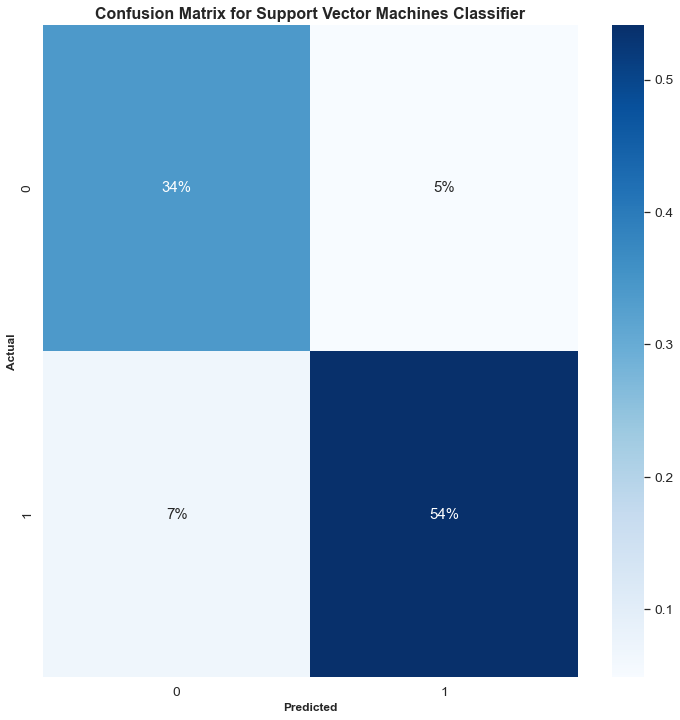

In [ ]:
# Confusion Matrix of Support Vector Machines Classifier using best hyperparameters from GridsearchCV

svc = SVC(gamma='auto', C=1, kernel='rbf')
svc.fit(X_train_pca,y_train)
svc_pred = svc.predict(X_test_pca)

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, svc_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.0%', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Machines Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

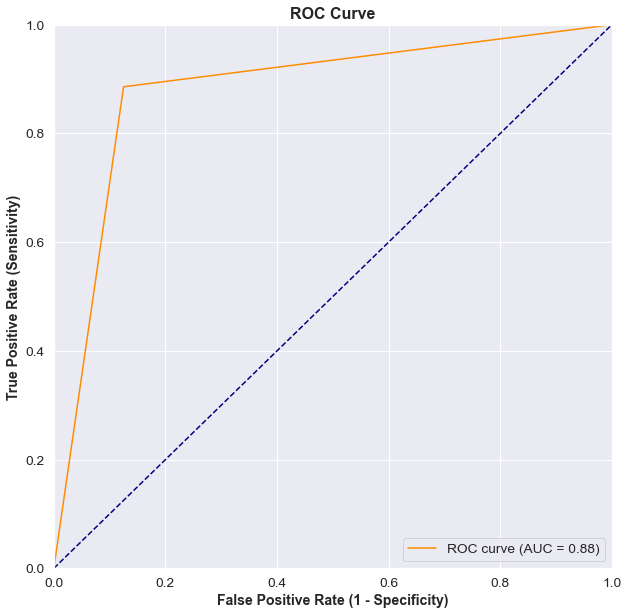

(array([0.   , 0.125, 1.   ]),
 array([0.        , 0.88581315, 1.        ]),
 array([2, 1, 0]))

In [ ]:
# Plot ROC curve from sklearn metrics for Support Vector Machines Classifier

fpr, tpr, thresholds = metrics.roc_curve(y_test, svc_pred)
plt.figure(figsize=(10,10))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, svc_pred)

Text(82.5, 0.5, 'Actual')

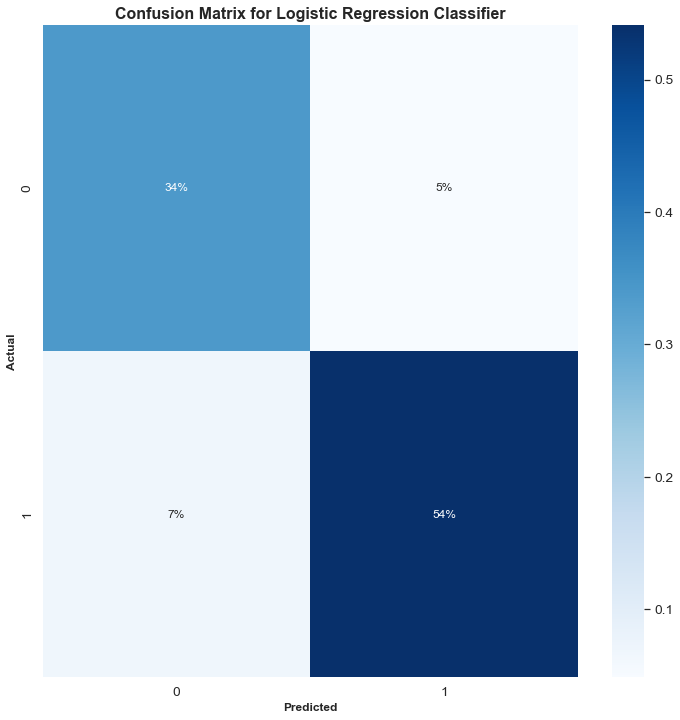

In [ ]:
# Confusion Matrix of Logistic Regression Classifier using best hyperparameters from GridsearchCV

lgr = LogisticRegression(solver='lbfgs', multi_class='multinomial', C=1)
lgr.fit(X_train_pca,y_train)
lgr_pred = lgr.predict(X_test_pca)

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, lgr_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.0%', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

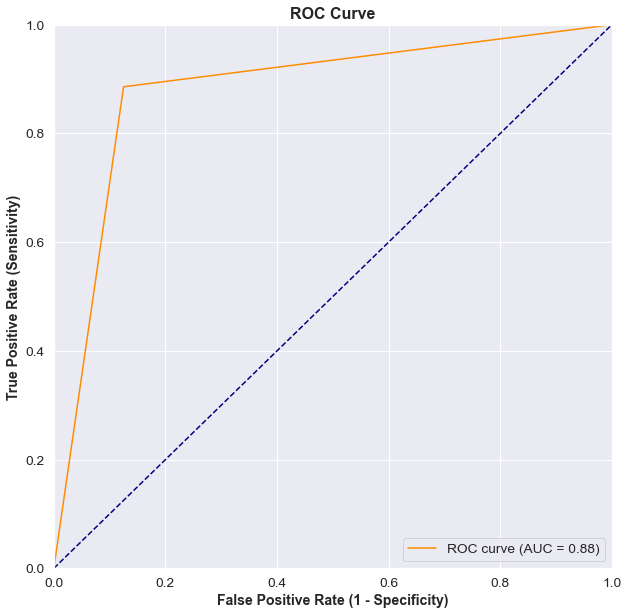

(array([0.   , 0.125, 1.   ]),
 array([0.        , 0.88581315, 1.        ]),
 array([2, 1, 0]))

In [ ]:
# Plot ROC curve from sklearn metrics for Logistic Regression Classifier

fpr, tpr, thresholds = metrics.roc_curve(y_test, lgr_pred)
plt.figure(figsize=(10,10))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, lgr_pred)

Text(82.5, 0.5, 'Actual')

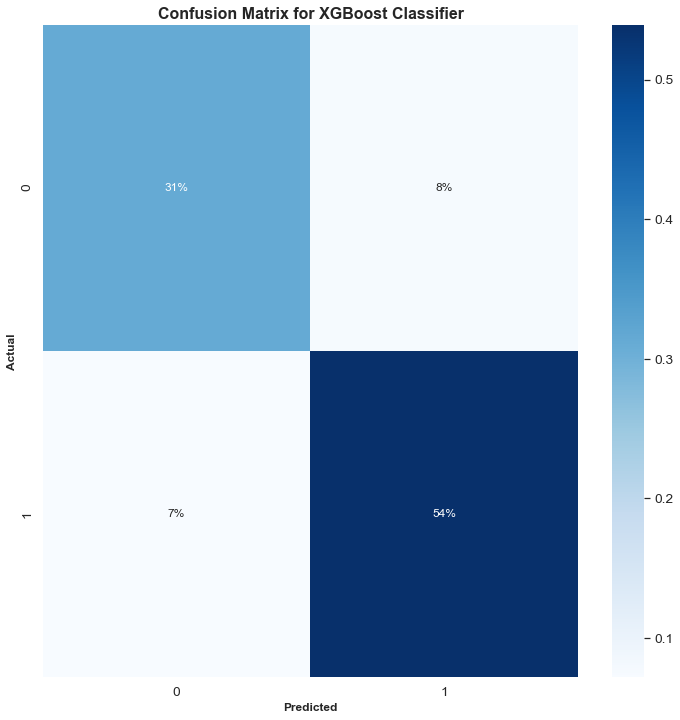

In [ ]:
# Confusion Matrix of XGBoost Classifier using best hyperparameters from GridsearchCV

xgb = XGBClassifier(n_estimators=20)
xgb.fit(X_train_pca,y_train)
xgb_pred = xgb.predict(X_test_pca)

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.0%', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

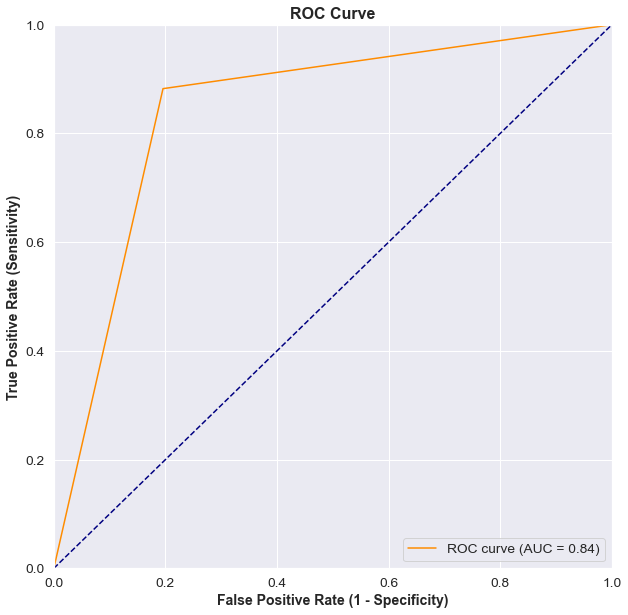

(array([0.        , 0.19565217, 1.        ]),
 array([0.        , 0.88235294, 1.        ]),
 array([2, 1, 0]))

In [ ]:
# Plot ROC curve from sklearn metrics for XGBoost Classifier

fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_pred)
plt.figure(figsize=(10,10))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, xgb_pred)

## 6. Neural Networks 

# Reinforcement Learning 

### Experiment 4: Apply Neural Networks Model for Advanced Learning

In [ ]:
# Check shape of input training data

X_train_pca.shape

(960, 37)

In [ ]:
# Define keras model
# model expects rows of data with 37 variables (input_dim=37)
# Random number of neurons for hidden layers used

model = Sequential()
model.add(Dense(64, input_dim=37, activation='relu')) #adding first hidden layer. 
model.add(Dense(32, activation='relu')) #adding second hidden layer
model.add(Dense(1, activation='sigmoid')) #adding output layer

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [ ]:
batch_size = 60 #Batch size of 60 for 960 samples (1 epoch will involve 16 batches)
epochs = 50

# fit the model

timeline = model.fit(X_train_pca, y_train,
           validation_split=0.2,
           batch_size=batch_size,
           epochs=epochs,
           callbacks=[
                tf.keras.callbacks.ReduceLROnPlateau()
            ]
           )

Epoch 1/50
13/13 [==============================] - 1s 27ms/step - loss: 0.6343 - accuracy: 0.6367 - auc: 0.6789 - val_loss: 0.6210 - val_accuracy: 0.6354 - val_auc: 0.6893 - lr: 0.0010
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5341 - accuracy: 0.7435 - auc: 0.8354 - val_loss: 0.5515 - val_accuracy: 0.7448 - val_auc: 0.7953 - lr: 0.0010
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.7982 - auc: 0.8786 - val_loss: 0.5033 - val_accuracy: 0.7604 - val_auc: 0.8453 - lr: 0.0010
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.8372 - auc: 0.8996 - val_loss: 0.4675 - val_accuracy: 0.7812 - val_auc: 0.8636 - lr: 0.0010
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.3835 - accuracy: 0.8516 - auc: 0.9119 - val_loss: 0.4514 - val_accuracy: 0.8125 - val_auc: 0.8706 - lr: 0.0010
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.

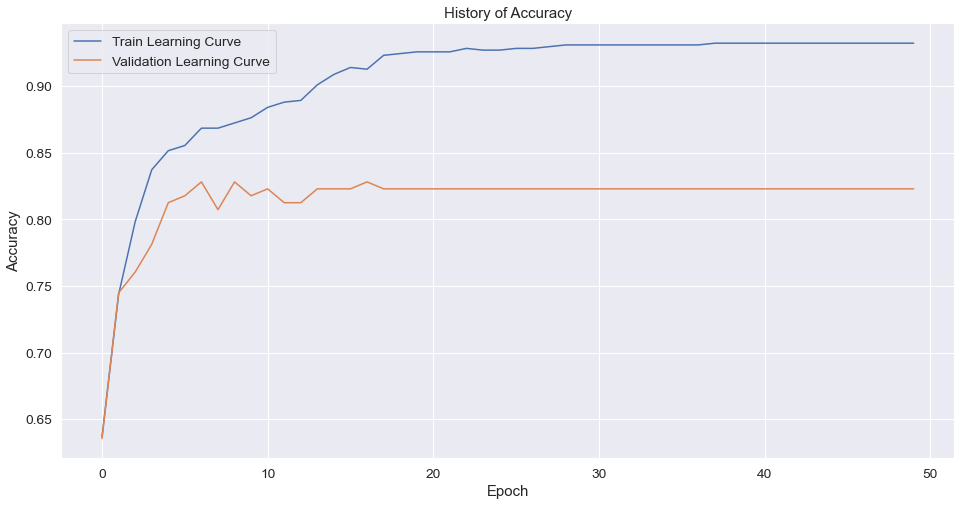

In [ ]:
# Plot accuracy of model vs number of epochs trained

plt.figure(figsize=(16, 8))

plt.plot(range(epochs), timeline.history['accuracy'], label="Train Learning Curve")
plt.plot(range(epochs), timeline.history['val_accuracy'], label="Validation Learning Curve")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("History of Accuracy")

plt.show()

In [ ]:
# Evaluate Model Performance

model.evaluate(X_test_pca, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8562 - auc: 0.9030


[0.3924579620361328, 0.8562368154525757, 0.9029543995857239]

In [ ]:
# Print Performance Metrics
_, train_acc, train_auc = model.evaluate(X_train_pca, y_train, verbose=0)
_, test_acc, test_auc = model.evaluate(X_test_pca, y_test, verbose=0)
print('Train Accuracy: %.3f, Train AUC: %.3f, Test Accuracy: %.3f, Test AUC: %.3f' % (train_acc, train_auc, test_acc, test_auc))

Train Accuracy: 0.910, Train AUC: 0.959, Test Accuracy: 0.856, Test AUC: 0.903


### Experiment 5: Apply hyperparameter tuning on number of neurons in hidden layers using GridsearchCV

In [ ]:
"""Attempt to improve model performance by applying hyperparameter tuning on the number of neurons
in hidden layers of the model using GridsearchCV. Dropout layers in conjunction with 
Layer weight constraints(Kernel Constraints) are used as regularization techniques to address overfitting.""" 

# Function to create model for KerasClassifier

def create_model(neurons=1):
    
    # create model
    model_hp = Sequential()
    model_hp.add(Dense(neurons, input_dim=37, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model_hp.add(Dropout(0.3)) #Dropout layer added
    model_hp.add(Dense(neurons, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3))) 
    model_hp.add(Dropout(0.3)) #Dropout layer added
    model_hp.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    # Compile model
    model_hp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    
    return model_hp

# Seed for reproducing performance
seed = 328
np.random.seed(seed)

In [ ]:
# create model
model_hp = KerasClassifier(build_fn=create_model, epochs=50, batch_size=60, verbose=0)

In [ ]:
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30, 35, 40]
param_grid = dict(neurons=neurons)

In [ ]:
#Apply grid search on list of neurons
grid = GridSearchCV(estimator=model_hp, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train_pca,y_train)


# Print Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.572917 (0.025937) with: {'neurons': 1}
0.837500 (0.025811) with: {'neurons': 5}
0.835417 (0.018808) with: {'neurons': 10}
0.829167 (0.024071) with: {'neurons': 15}
0.837500 (0.018458) with: {'neurons': 20}
0.829167 (0.012500) with: {'neurons': 25}
0.826042 (0.020199) with: {'neurons': 30}
0.831250 (0.017921) with: {'neurons': 35}
0.826042 (0.013421) with: {'neurons': 40}


In [ ]:
# Build new model using number of neurons with high mean scores from GridsearchCV
# model expects rows of data with 37 variables (input_dim=37)

model_hp = Sequential()
model_hp.add(Dense(15, input_dim=37, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3)))
model_hp.add(Dropout(0.3))
model_hp.add(Dense(5, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3))) 
model_hp.add(Dropout(0.3))
model_hp.add(Dense(1, activation='sigmoid')) #adding output layer

In [ ]:
# compile the keras model
model_hp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [ ]:
batch_size = 60 
epochs = 50

#fitting the model

timeline_hp = model_hp.fit(X_train_pca,y_train,
              validation_split=0.2,
              batch_size=batch_size,
              epochs=epochs,
              callbacks=[
                tf.keras.callbacks.ReduceLROnPlateau()
            ]
           )

Epoch 1/50
13/13 [==============================] - 1s 25ms/step - loss: 0.6910 - accuracy: 0.5482 - auc: 0.4973 - val_loss: 0.6872 - val_accuracy: 0.5938 - val_auc: 0.6011 - lr: 0.0010
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6832 - accuracy: 0.5703 - auc: 0.6618 - val_loss: 0.6778 - val_accuracy: 0.5938 - val_auc: 0.7973 - lr: 0.0010
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.5677 - auc: 0.7563 - val_loss: 0.6624 - val_accuracy: 0.5938 - val_auc: 0.8557 - lr: 0.0010
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6500 - accuracy: 0.5807 - auc: 0.8244 - val_loss: 0.6401 - val_accuracy: 0.5938 - val_auc: 0.8775 - lr: 0.0010
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6215 - accuracy: 0.6263 - auc: 0.8594 - val_loss: 0.6104 - val_accuracy: 0.6250 - val_auc: 0.8815 - lr: 0.0010
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.

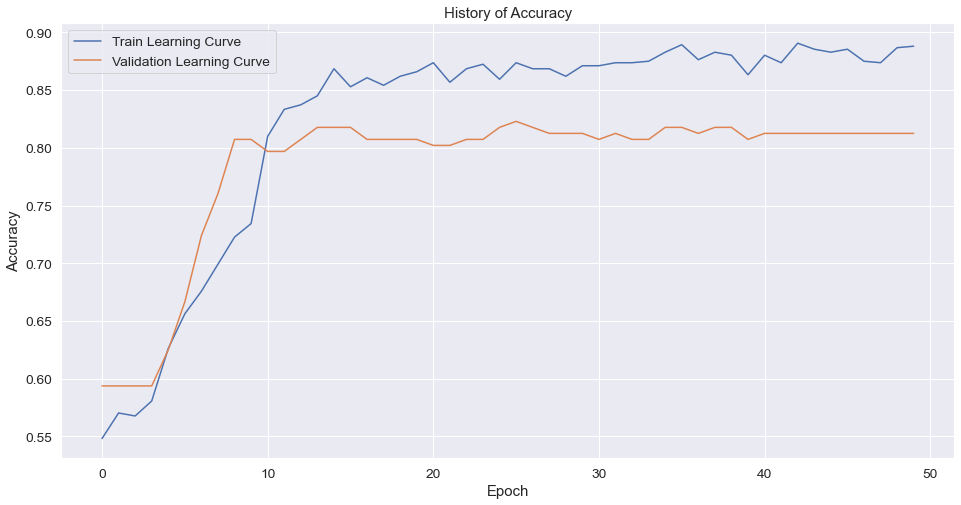

In [ ]:
# Plot accuracy of model vs number of epochs trained

plt.figure(figsize=(16, 8))

plt.plot(range(epochs), timeline_hp.history['accuracy'], label="Train Learning Curve")
plt.plot(range(epochs), timeline_hp.history['val_accuracy'], label="Validation Learning Curve")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("History of Accuracy")

plt.show()

In [ ]:
# Evaluate Nueral Networks Model Performance

model_hp.evaluate(X_test_pca, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8605 - auc: 0.9103


[0.36765965819358826, 0.8604651093482971, 0.9102508425712585]

In [ ]:
# Print Performance Metrics
_, train_acc, train_auc = model_hp.evaluate(X_train_pca, y_train, verbose=0)
_, test_acc, test_auc = model_hp.evaluate(X_test_pca, y_test, verbose=0)
print('Train Accuracy: %.3f, Train AUC: %.3f, Test Accuracy: %.3f, Test AUC: %.3f' % (train_acc, train_auc, test_acc, test_auc))

Train Accuracy: 0.886, Train AUC: 0.933, Test Accuracy: 0.860, Test AUC: 0.910


## 7.  Conclusions

Neural networks have several advantages such as having a distributed memory, fault tolerance, and parallel processing capability. They can "learn" without supervision and produce remarkable results in many applications. Neural Networks tend to have higher average accuracy compared to traditional supervised learning algorithms; however, it needs larger training data for better performance to be achieved, which is also a limitation in this study. Supervised learning algorithms can be easily applied with high performance when the training data is less. Supervised learning algorithms are also commonly used in some production scenarios because of the interpretability of model parameters.

The analysis conducted to analyse and predict the attitude of employees towards mental health in the workplace showed promising prospects with many machine learning algorithms achieving high accuracy on holdout-unseen data. Such models can be applied by organizations in their mental health awareness or wellness program, to take proactive steps in ensuring that employees stay healthy and productive at work. This can also address the ethical concern indicated in the study that though many Tech Companies provide mental health benefits, they do not have mental health wellness or awareness program in place for their employees. It can also help to keep in check litigation issues that can arise for organizations with work ethics that pose a danger to the mental health of their employees.

The study showed that the data collection method of online survey can be an effective data source for machine learning models if the data validation and experimental design are done properly. An example is the “Age” and “Gender” variables captured for this study which could have provided more accurate data if the design had proper validation to allow only valid age or avoid the entry of free text for the gender variable.